<a href="https://colab.research.google.com/github/grifithraj/Customer-Churn-Prediction/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [12]:
import os
import pandas as pd

# List the contents of the downloaded directory to find the correct file path
print(os.listdir(path))

# Assuming the file is directly in the path, or adjust based on the above output
df = pd.read_csv(f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

['WA_Fn-UseC_-Telco-Customer-Churn.csv']
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streami

In [13]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
import kagglehub
import os
import pandas as pd

# Ensure 'path' is defined by re-downloading the dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# Ensure 'df' is defined by reading the CSV
df = pd.read_csv(f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Original operations to convert 'TotalCharges' and fill missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

Using Colab cache for faster access to the 'telco-customer-churn' dataset.


In [16]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [17]:
df.drop('customerID', axis=1, inplace=True)

In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

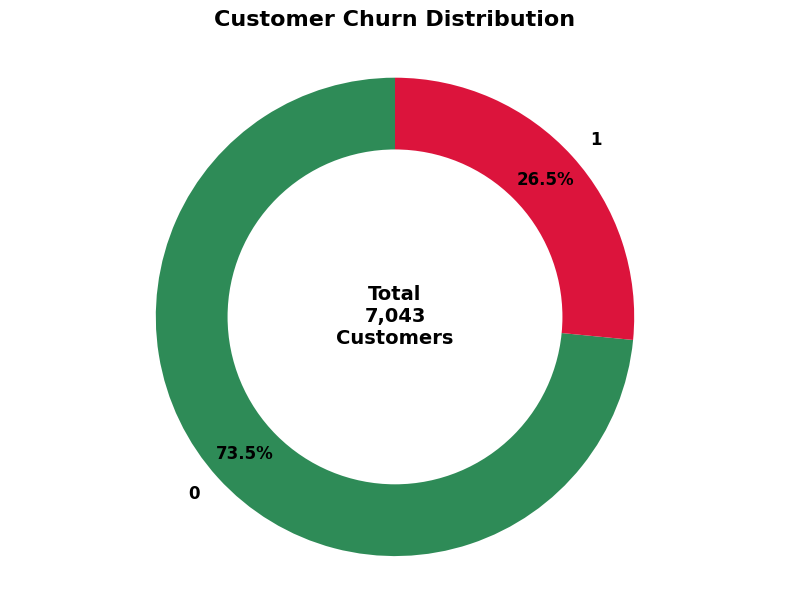

In [22]:

plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
colors = ['#2E8B57', '#DC143C']
wedges, texts, autotexts = plt.pie(churn_counts.values,
                                   labels=churn_counts.index,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   pctdistance=0.85,
                                   textprops={'fontsize': 12, 'fontweight': 'bold'})


centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

total_customers = len(df)
plt.text(0, 0, f'Total\n{total_customers:,}\nCustomers',
         ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

The Customer Churn Distribution chart indicates that:

26.5% of customers have churned (i.e., stopped using the service),

73.5% have remained loyal,

Out of a total of 7,043 customers.

Inference: This dataset is imbalanced, with a significantly higher proportion of non-churned customers. While the churn rate of 26.5% is not negligible and warrants attention, the imbalance should be addressed during model training (e.g., using SMOTE, class weights, or resampling) to avoid bias toward the majority class.

Additionally, the churn rate suggests that over 1 in 4 customers is leaving, which may point to underlying issues in service, pricing, or support that require business intervention.

In [26]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Train Set Size: (5634, 30)
Test Set Size: (1409, 30)


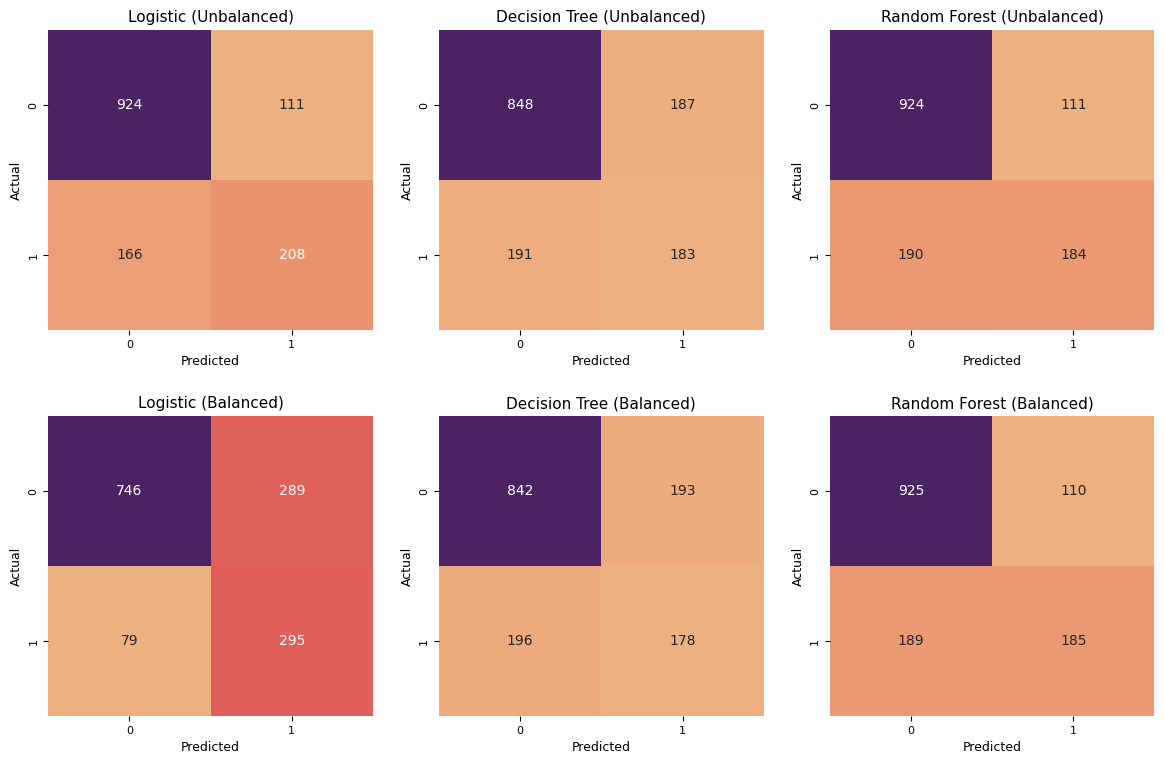

In [27]:

models = {
    "Logistic (Unbalanced)": LogisticRegression(max_iter=1000),
    "Decision Tree (Unbalanced)": DecisionTreeClassifier(),
    "Random Forest (Unbalanced)": RandomForestClassifier(random_state=42),
    "Logistic (Balanced)": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree (Balanced)": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest (Balanced)": RandomForestClassifier(class_weight='balanced', random_state=42)
}

conf_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    conf_matrices[name] = cm

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for idx, (name, cm) in enumerate(conf_matrices.items()):
    row = idx // 3
    col = idx % 3

    sns.heatmap(cm, annot=True, fmt='d', cmap='flare', ax=axes[row, col],
                cbar=False, annot_kws={"size": 10})
    axes[row, col].set_title(name, fontsize=11)
    axes[row, col].set_xlabel('Predicted', fontsize=9)
    axes[row, col].set_ylabel('Actual', fontsize=9)
    axes[row, col].tick_params(axis='both', labelsize=8)

plt.tight_layout(pad=2.0)
plt.show()
